In [15]:
import numpy as np


#Inicilizar la red con todos los pesos nulos
def red(n_inputs, n_hidden, n_outputs):
	red = []
	hidden_layer = [{'weights':[0 for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	red.append(hidden_layer)
	output_layer = [{'weights':[0 for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	red.append(output_layer)
	return red

# forwardpass
def forward(red, inputs):
	lista = inputs
	for capa in red:
		new_inputs = []
		for neuron in capa:
			
			act=np.dot(neuron["weights"][0:-1],lista[0:len(neuron["weights"])])+neuron["weights"][-1]#activa
			neuron['output'] = 1.0/(1.0+np.exp(-act)) #sigmoide
			new_inputs.append(neuron['output'])
			
		lista = new_inputs
	return lista


# Backward pass
def backward(network, expected):
	for i in reversed(range(len(network))):
		capa = network[i]
		errores = []
		if i != len(network)-1:#si la capa no es la ultima

			for j in range(len(capa)):
				error = 0.0
				for neuron in network[i + 1]:
					
					error += (neuron['weights'][j] * neuron['epsilon'])
				errores.append(error)
		else:
			
			for j in range(len(capa)):
				errores.append(expected[j] - capa[j]['output'])
		
		for j in range(len(capa)):
			derivada=capa[j]['output']*(1.0-capa[j]['output'])#derivada de la sigmoide
			capa[j]['epsilon'] = errores[j] * derivada #se guarda el error en la neurona



# Entrenamiento
def train(network, train_data, indices, l_rate, n_epoch, n_outputs,listaerror):
	for epoch in range(n_epoch):
		suma_error = 0
		for row in train_data:
			h=0
			outputs = forward(network, row)
			expected=[0 for i in range(n_outputs)]
			expected[indices[h]-1]=1
			suma_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward(network, expected)
			for i in range(len(network)):
				inputs = row[:-1]
				if i != 0:
					inputs = [neuron['output'] for neuron in network[i - 1]]
				for neuron in network[i]:
					for j in range(len(inputs)):
						neuron['weights'][j] += l_rate * neuron['epsilon'] * inputs[j]
					neuron['weights'][-1] += l_rate * neuron['epsilon']
			h=h+1
		listaerror.append(suma_error)
		
		print('>epoch=%d,error=%.3f' % (epoch,suma_error))		
		
def traindecay(network, train_data, indices, l_rate,w_decay, n_epoch, n_outputs,listaerror):
	for epoch in range(n_epoch):
		suma_error = 0
		for row in train_data:
			h=0
			outputs = forward(network, row)
			expected=[0 for i in range(n_outputs)]
			expected[indices[h]-1]=1
			suma_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward(network, expected)
			for i in range(len(network)):
				inputs = row[:-1]
				if i != 0:
					inputs = [neuron['output'] for neuron in network[i - 1]]
				for neuron in network[i]:
					for j in range(len(inputs)):
						neuron['weights'][j] += l_rate * neuron['epsilon'] * inputs[j] + w_decay*l_rate*neuron['weights'][j]
					neuron['weights'][-1] += l_rate * neuron['epsilon']+w_decay*l_rate*neuron['weights'][-1]
			h=h+1
		listaerror.append(suma_error)

		print('>epoch=%d,error=%.3f' % (epoch,suma_error))	

>epoch=0,error=12.079
>epoch=1,error=1.062
>epoch=2,error=0.567
>epoch=3,error=0.382
>epoch=4,error=0.286
>epoch=5,error=0.228
>epoch=6,error=0.189
>epoch=7,error=0.161
>epoch=8,error=0.140
>epoch=9,error=0.124


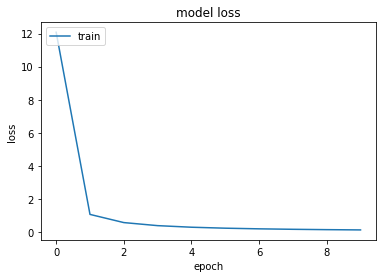

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random 
df=pd.read_csv("seeds.txt", sep='\t', index_col=7)
data= df.values.tolist()


indices=df.index.tolist()
scaler=StandardScaler().fit(data)
data=scaler.transform(data)
n_inputs = len(data[0])
n_hidden=3
n_outputs = 3

network = red(n_inputs, n_hidden, n_outputs)
lr=0.5
n_epochs=10
err=[]
train(network, data,indices, lr, n_epochs, n_outputs,err)

plt.plot(err)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


>epoch=0,error=11.728
>epoch=1,error=0.662
>epoch=2,error=0.204
>epoch=3,error=0.068
>epoch=4,error=0.021
>epoch=5,error=0.006
>epoch=6,error=0.001
>epoch=7,error=0.000
>epoch=8,error=0.000
>epoch=9,error=0.000


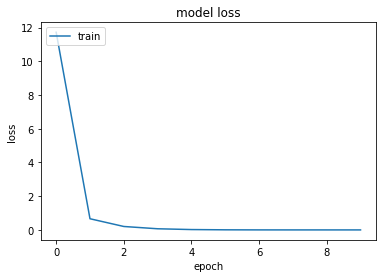

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import funciones as fun
from sklearn.preprocessing import StandardScaler
import random 
df=pd.read_csv("seeds.txt", sep='\t', index_col=7)
data= df.values.tolist()

indices=df.index.tolist()
scaler=StandardScaler().fit(data)
data=scaler.transform(data)
n_inputs = len(data[0])
n_hidden=3
n_outputs = 3

network = red(n_inputs, n_hidden, n_outputs)
lr=0.5
decay=0.001
n_epochs=10
err=[]
traindecay(network, data,indices, lr,decay, n_epochs, n_outputs,err)

plt.plot(err)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


Se observa que con "Weight Decay" la convergencia es mas rapida que sin este.